In [1]:
import os
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cd ../src

/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src


In [3]:
encoded_full_lstm_32 = '../experiments/cpu-baselines/stateaction_encodedlstm_12/binconcepts/raw/raw_full/0/logger/ctLSTM_nlayers2_ncells32_drop02_optimadam_losscce_bs64_ep200long short term memory/'
encoded_scrop_lstm_32 = '../experiments/cpu-baselines/stateaction_encodedlstm_12/binconcepts/raw/raw_scrop/0/logger/ctLSTM_nlayers2_ncells32_drop02_optimadam_losscce_bs64_ep200long short term memory/'
encoded_scrop_lstm_64 = '../experiments/cpu-baselines/stateaction_encodedlstm_12/binconcepts/raw/raw_scrop/0/logger/ctLSTM_nlayers2_ncells64_drop02_optimadam_losscce_bs64_ep200long short term memory/'

seconds_full_lstm_32 = '../experiments/cpu-baselines/stateaction_secondslstm_12/binconcepts/raw/raw_full/0/logger/ctLSTM_nlayers2_ncells32_drop02_optimadam_losscce_bs64_ep200long short term memory/'
seconds_scrop_lstm_32 = '../experiments/cpu-baselines/stateaction_secondslstm_12/binconcepts/raw/raw_scrop/0/logger/ctLSTM_nlayers2_ncells32_drop02_optimadam_losscce_bs64_ep200long short term memory/'
seconds_scrop_lstm_64 = '../experiments/cpu-baselines/stateaction_secondslstm_12/binconcepts/raw/raw_scrop/0/logger/ctLSTM_nlayers2_ncells64_drop02_optimadam_losscce_bs64_ep200long short term memory/'

In [33]:
def plot_folds(pathname, title, val_metric='val_categorical_crossentropy'):
    files = os.listdir(pathname)
    files = [file for file in files if file.endswith('.csv')]
    files.sort()
    plt.figure(figsize=(12, 4))
    for file in files:
        model = pd.read_csv(pathname + file, sep=';')
        plt.plot(model['epoch'], model[val_metric], label=file[0:2])
    title = 'Fold result for ' + title + ' [' + val_metric + ']'
    plt.ylim([0.5, 0.75])
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_shaded_folds(pathname, title, val_metric='val_categorical_crossentropy'):
    files = os.listdir(pathname)
    files = [file for file in files if file.endswith('.csv')]
    files.sort()
    
    metrics = []
    val_metrics = []
    
    plt.figure(figsize=(12, 8))
    for file in files:
        model = pd.read_csv(pathname + file, sep=';')
        metrics.append(list(model[val_metric]))
        val_metrics.append(list(model['val_' + val_metric]))
        
    minimums = np.min([(len(metr)) for metr in metrics])
    metrics = [metri[:minimums] for metri in metrics]
    means = np.mean(metrics, axis=0)
    stds = np.std(metrics, axis=0)
    
    plt.plot(model['epoch'], means, color='#abc4ff')
    plt.fill_between(model['epoch'], means - stds, means + stds, alpha=0.3, color='#abc4ff', label='train')

    minimums = np.min([(len(metr)) for metr in val_metrics])
    val_metrics = [metri[:minimums] for metri in val_metrics]
    means = np.mean(val_metrics, axis=0)
    stds = np.std(val_metrics, axis=0)
    
    plt.plot(model['epoch'], means, color='#ff5c8a')
    plt.fill_between(model['epoch'], means - stds, means + stds, alpha=0.3, color='#ff5c8a', label='validation')
    
    title = 'Fold result for ' + title + ' [' + val_metric + ']'
    plt.ylim([0.5, 0.75])
    plt.legend()
    plt.title(title)
    plt.show()

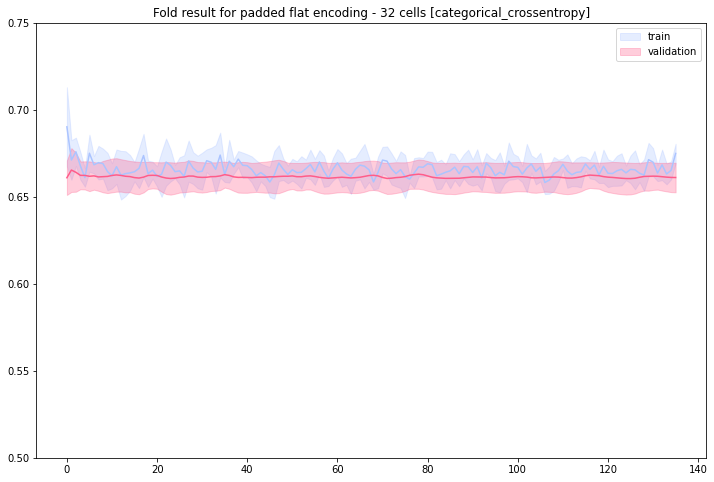

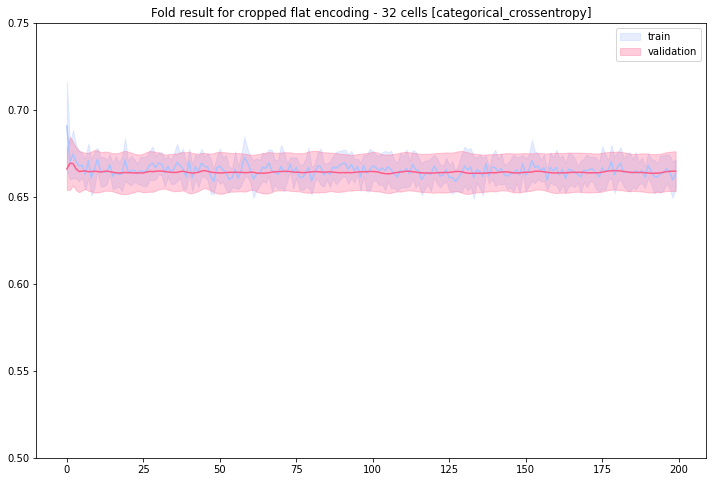

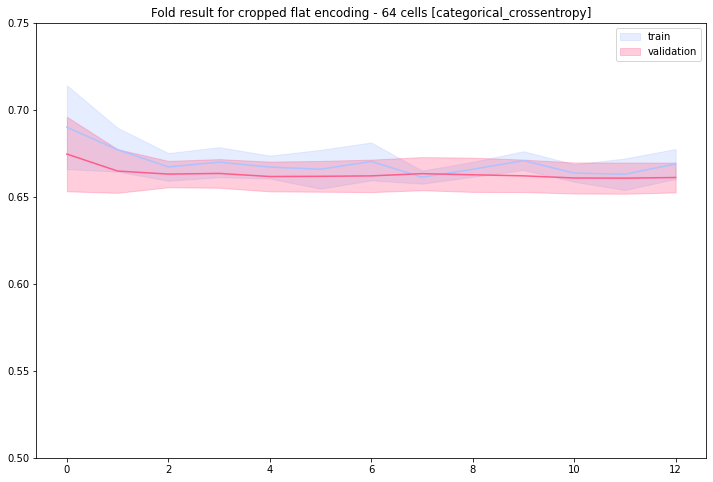

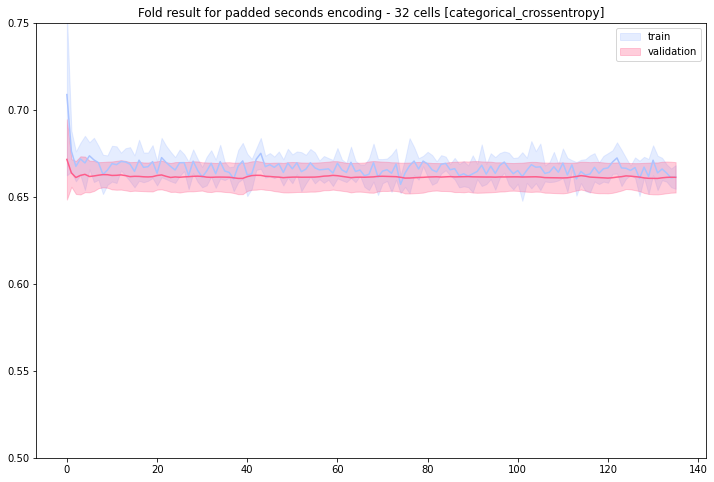

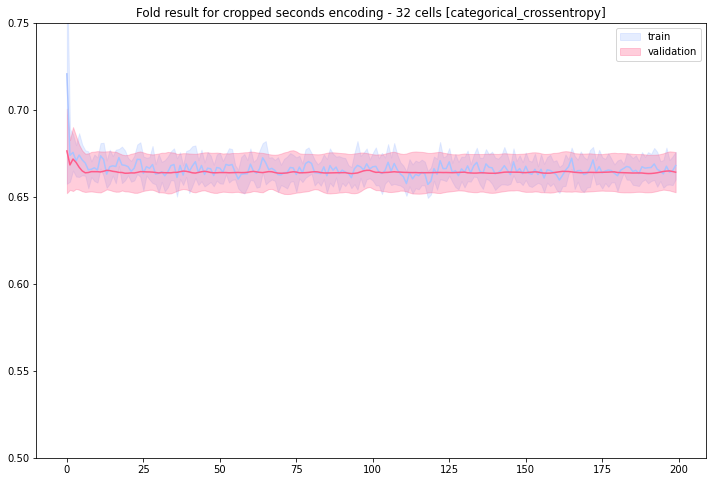

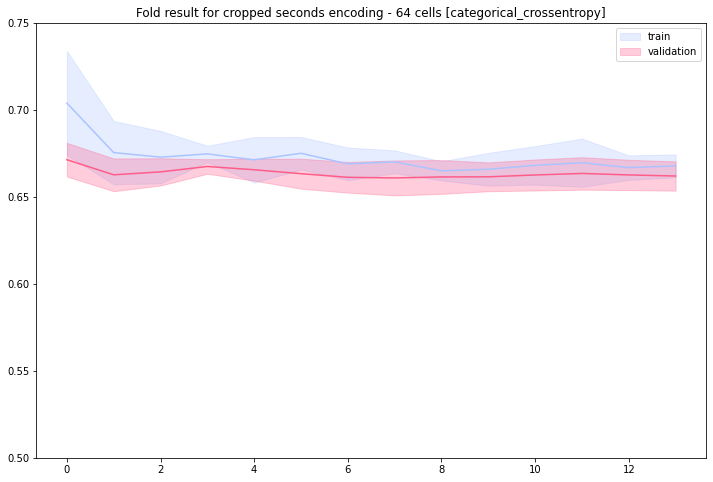

In [34]:
plot_shaded_folds(encoded_full_lstm_32, 'padded flat encoding - 32 cells', 'categorical_crossentropy')
plot_shaded_folds(encoded_scrop_lstm_32, 'cropped flat encoding - 32 cells', 'categorical_crossentropy')
plot_shaded_folds(encoded_scrop_lstm_64, 'cropped flat encoding - 64 cells', 'categorical_crossentropy')

plot_shaded_folds(seconds_full_lstm_32, 'padded seconds encoding - 32 cells', 'categorical_crossentropy')
plot_shaded_folds(seconds_scrop_lstm_32, 'cropped seconds encoding - 32 cells', 'categorical_crossentropy')
plot_shaded_folds(seconds_scrop_lstm_64, 'cropped seconds encoding - 64 cells', 'categorical_crossentropy')

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


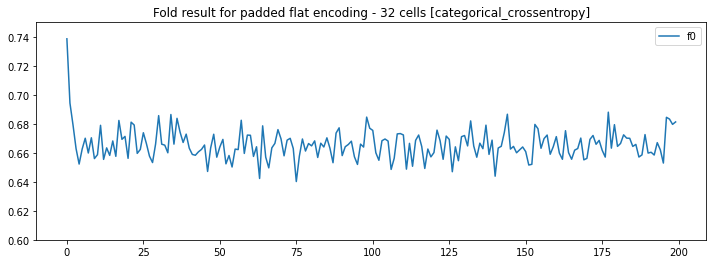

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


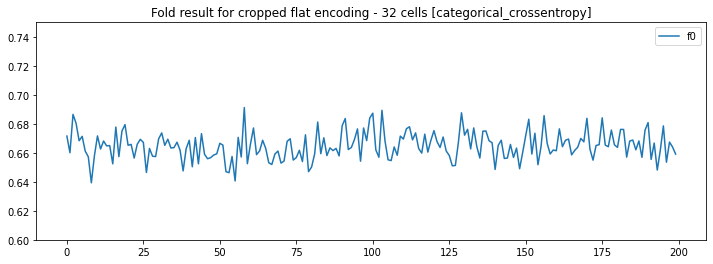

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


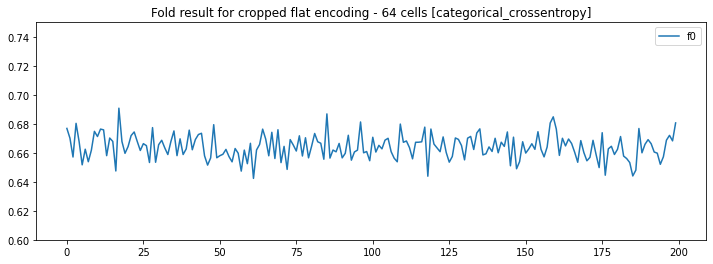

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


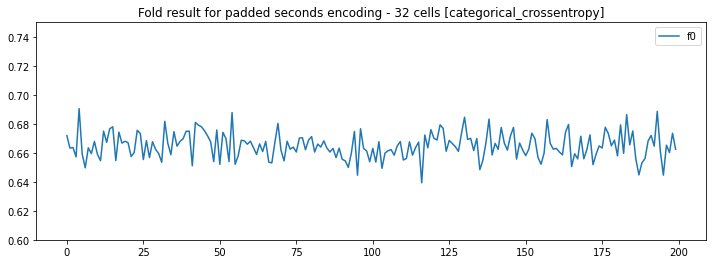

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


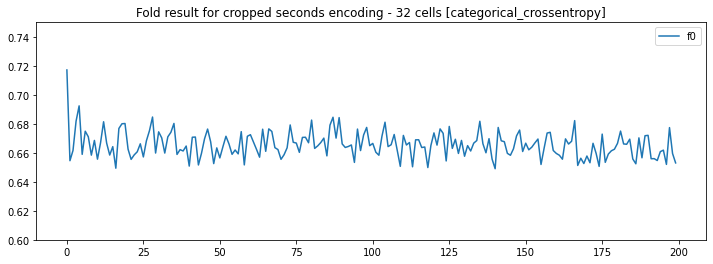

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


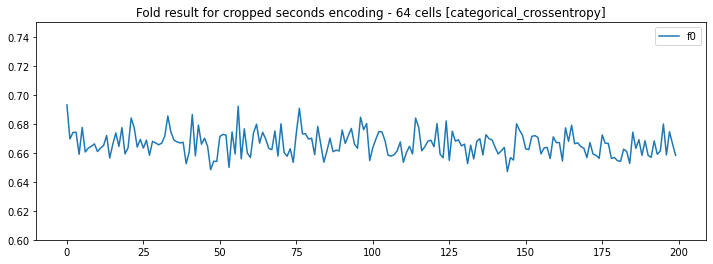

In [16]:
plot_folds(encoded_full_lstm_32, 'padded flat encoding - 32 cells', 'categorical_crossentropy')
plot_folds(encoded_scrop_lstm_32, 'cropped flat encoding - 32 cells', 'categorical_crossentropy')
plot_folds(encoded_scrop_lstm_64, 'cropped flat encoding - 64 cells', 'categorical_crossentropy')

plot_folds(seconds_full_lstm_32, 'padded seconds encoding - 32 cells', 'categorical_crossentropy')
plot_folds(seconds_scrop_lstm_32, 'cropped seconds encoding - 32 cells', 'categorical_crossentropy')
plot_folds(seconds_scrop_lstm_64, 'cropped seconds encoding - 64 cells', 'categorical_crossentropy')

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


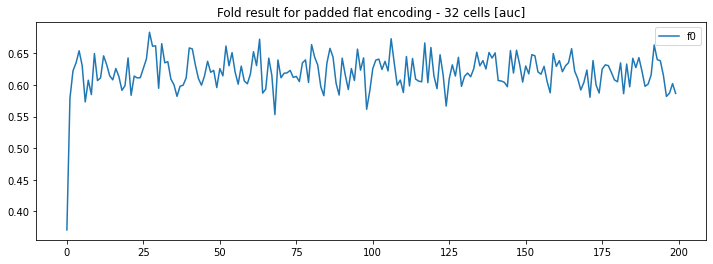

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


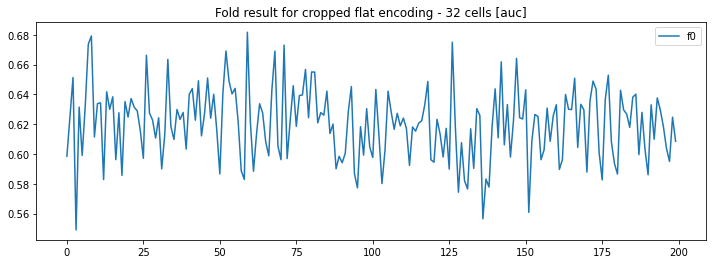

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


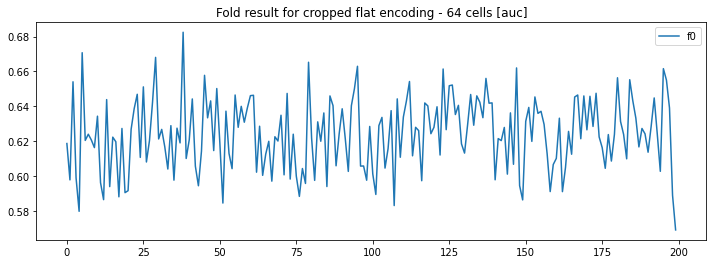

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


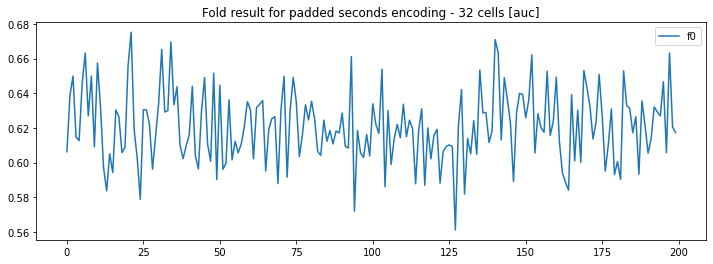

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


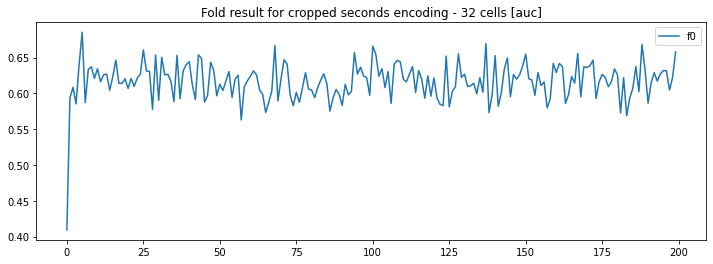

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


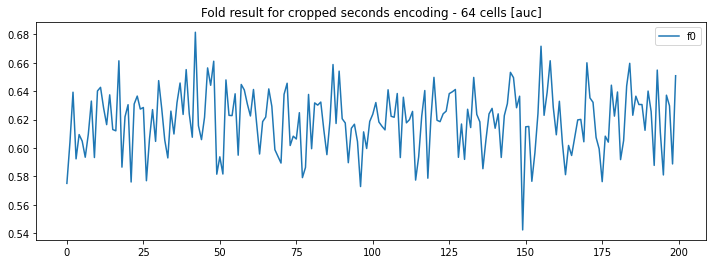

In [13]:
plot_folds(encoded_full_lstm_32, 'padded flat encoding - 32 cells', 'auc')
plot_folds(encoded_scrop_lstm_32, 'cropped flat encoding - 32 cells', 'auc')
plot_folds(encoded_scrop_lstm_64, 'cropped flat encoding - 64 cells', 'auc')

plot_folds(seconds_full_lstm_32, 'padded seconds encoding - 32 cells', 'auc')
plot_folds(seconds_scrop_lstm_32, 'cropped seconds encoding - 32 cells', 'auc')
plot_folds(seconds_scrop_lstm_64, 'cropped seconds encoding - 64 cells', 'auc')

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


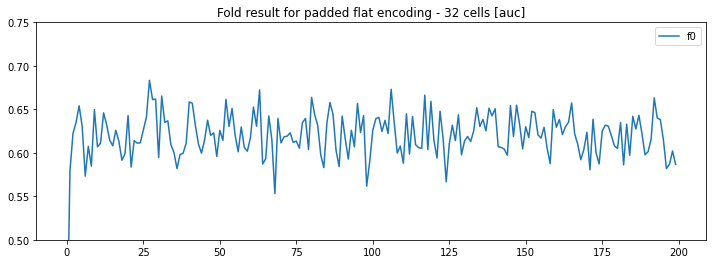

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


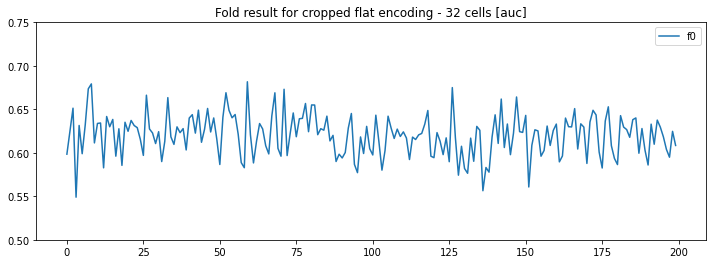

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


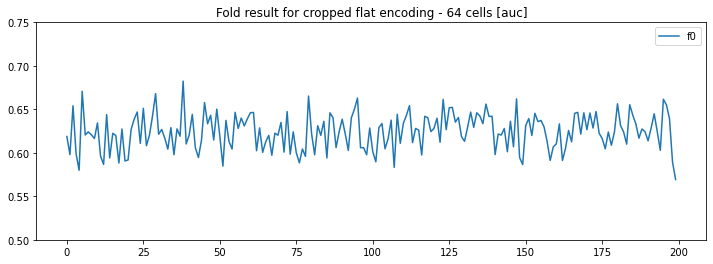

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


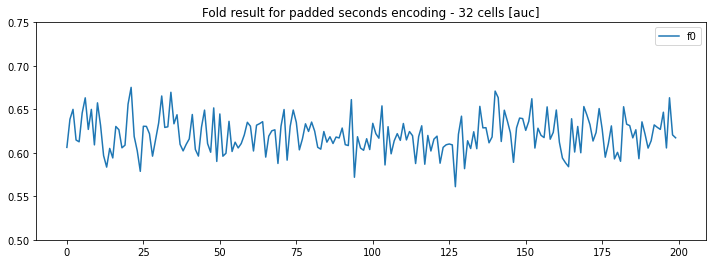

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


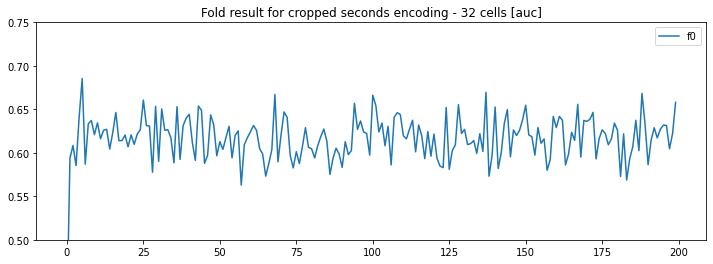

Index(['epoch', 'auc', 'categorical_crossentropy', 'loss', 'val_auc',
       'val_categorical_crossentropy', 'val_loss'],
      dtype='object')


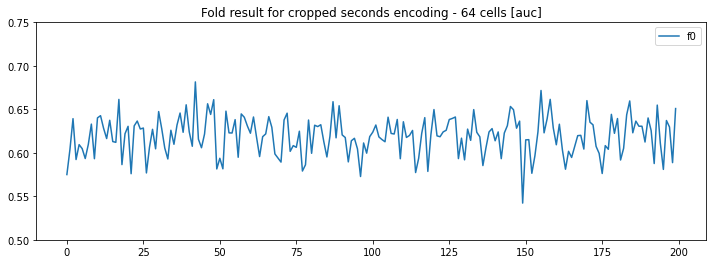

In [19]:
plot_folds(encoded_full_lstm_32, 'padded flat encoding - 32 cells', val_metric='auc')
plot_folds(encoded_scrop_lstm_32, 'cropped flat encoding - 32 cells', val_metric='auc')
plot_folds(encoded_scrop_lstm_64, 'cropped flat encoding - 64 cells', val_metric='auc')

plot_folds(seconds_full_lstm_32, 'padded seconds encoding - 32 cells', val_metric='auc')
plot_folds(seconds_scrop_lstm_32, 'cropped seconds encoding - 32 cells', val_metric='auc')
plot_folds(seconds_scrop_lstm_64, 'cropped seconds encoding - 64 cells', val_metric='auc')

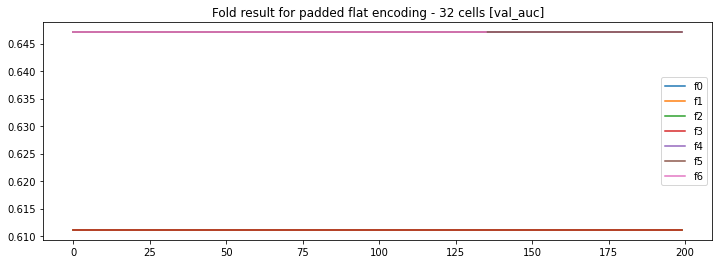

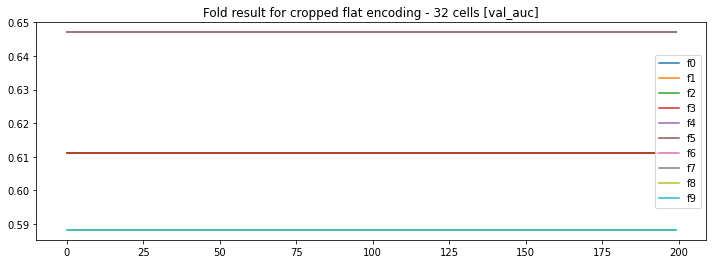

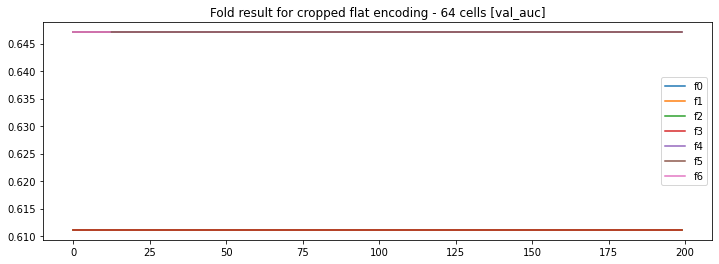

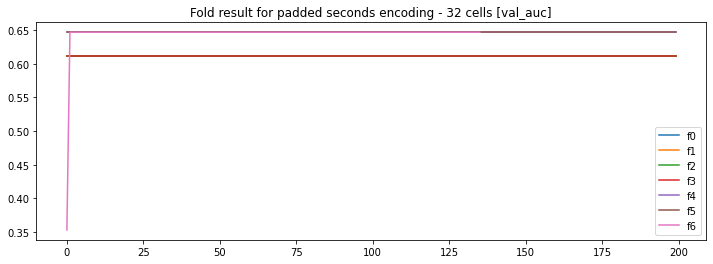

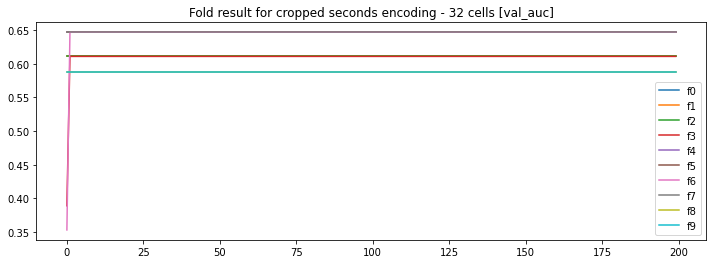

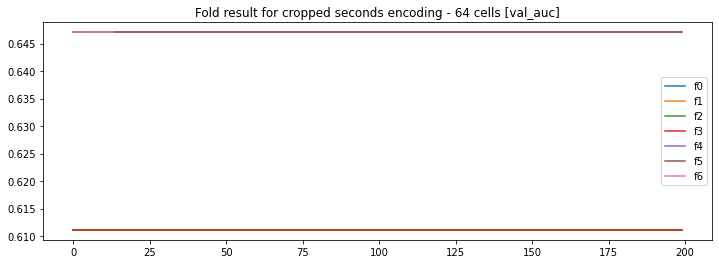

In [6]:
plot_folds(encoded_full_lstm_32, 'padded flat encoding - 32 cells', val_metric='val_auc')
plot_folds(encoded_scrop_lstm_32, 'cropped flat encoding - 32 cells', val_metric='val_auc')
plot_folds(encoded_scrop_lstm_64, 'cropped flat encoding - 64 cells', val_metric='val_auc')

plot_folds(seconds_full_lstm_32, 'padded seconds encoding - 32 cells', val_metric='val_auc')
plot_folds(seconds_scrop_lstm_32, 'cropped seconds encoding - 32 cells', val_metric='val_auc')
plot_folds(seconds_scrop_lstm_64, 'cropped seconds encoding - 64 cells', val_metric='val_auc')

In [35]:
pwd

'/Users/cock/kDrive/PhD/Projects/Labs/beerslaw-lab/src'

In [36]:
with open('../data/sequenced_simulations/stateaction_secondslstm_12/id_dictionary.pkl', 'rb') as fp:
    idd = pickle.load(fp)

In [37]:
(idd['index'])

{'svdphyjs': 0,
 '2ae6q3hw': 3,
 '8jp62suc': 5,
 'e93na59g': 6,
 'chm4sr6j': 7,
 'gc663sap': 8,
 '8nh4zvcp': 10,
 '7t9zwtmr': 11,
 'wvxkvhne': 13,
 '43e33t3h': 14,
 'a3vdjxy9': 16,
 'mkw5afyy': 17,
 'dq4zzkyt': 20,
 '5f4q4ng5': 22,
 'temu2736': 23,
 'f54jkrsw': 25,
 'ujpk3gf4': 27,
 'jkbx6axr': 28,
 'vwfpuqaz': 31,
 'w7asnymz': 33,
 '2hr6mkdc': 34,
 'nrxpa2ac': 35,
 '5zrt4f8z': 36,
 'm3d89p29': 37,
 'vjr7tshm': 38,
 'egg8756y': 39,
 'uhbpoog9': 41,
 'bg7x3db2': 43,
 'xz56yha8': 46,
 'rrykpeqz': 47,
 '55yavcue': 48,
 'p44vw7td': 50,
 'fu6nsdhs': 51,
 '2ejxq2u8': 52,
 'ky8kttpv': 54,
 'rdbqasqa': 55,
 'zgyc948n': 56,
 'c9dj36r7': 57,
 'xvsgn53d': 60,
 'qsd9cb5e': 61,
 '9pjrsbth': 62,
 'cp7mfn24': 63,
 'j9qgkaej': 64,
 '982cf4dn': 65,
 '4zsmj6s3': 66,
 '85pdk9mq': 68,
 'hf8uz5t3': 69,
 'k7p5eryf': 72,
 'x844md8u': 73,
 'baqyfz2h': 74,
 '2ep3hayy': 75,
 'jwntt96k': 77,
 'wktpsvp8': 79,
 'h75kp27p': 80,
 '26z3wbqz': 81,
 'x5sm9pfu': 82,
 'mnhmyuhb': 84,
 'tsrnkj8w': 85,
 '6h5vmwys': 87,
 'y

In [40]:
with open('../notebooks/debug_filter_data.pkl', 'rb') as fp:
    d = pickle.load(fp)

In [42]:
d['index']

{'svdphyjs': 0,
 '2ae6q3hw': 1,
 '8jp62suc': 2,
 'e93na59g': 3,
 'chm4sr6j': 4,
 'gc663sap': 5,
 '8nh4zvcp': 6,
 '7t9zwtmr': 7,
 'wvxkvhne': 8,
 '43e33t3h': 9,
 'a3vdjxy9': 10,
 'mkw5afyy': 11,
 'dq4zzkyt': 12,
 '5f4q4ng5': 13,
 'temu2736': 14,
 'f54jkrsw': 15,
 'ujpk3gf4': 16,
 'jkbx6axr': 17,
 'w7asnymz': 18,
 '2hr6mkdc': 19,
 'nrxpa2ac': 20,
 '5zrt4f8z': 21,
 'm3d89p29': 22,
 'vjr7tshm': 23,
 'egg8756y': 24,
 'uhbpoog9': 25,
 'bg7x3db2': 26,
 'xz56yha8': 27,
 'rrykpeqz': 28,
 '55yavcue': 29,
 'p44vw7td': 30,
 'fu6nsdhs': 31,
 'ky8kttpv': 32,
 'rdbqasqa': 33,
 'zgyc948n': 34,
 'c9dj36r7': 35,
 'xvsgn53d': 36,
 'qsd9cb5e': 37,
 '9pjrsbth': 38,
 'j9qgkaej': 39,
 '982cf4dn': 40,
 '4zsmj6s3': 41,
 '85pdk9mq': 42,
 'hf8uz5t3': 43,
 'k7p5eryf': 44,
 'x844md8u': 45,
 'baqyfz2h': 46,
 '2ep3hayy': 47,
 'jwntt96k': 48,
 'wktpsvp8': 49,
 'h75kp27p': 50,
 '26z3wbqz': 51,
 'x5sm9pfu': 52,
 'mnhmyuhb': 53,
 'tsrnkj8w': 54,
 '6h5vmwys': 55,
 'ybxahrra': 56,
 'u25vrfyy': 57,
 'rgeb7wr9': 58,
 'favvt

In [7]:
ni = 1
for i in range(16, 8, -1):
    ni *= i

In [4]:
ni

518918400

In [14]:
di = 1
for i in range(8, 0, -1):
    ni /= i

In [15]:
ni / di

12870.0